## 1. Load Dataset

In [118]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset
df = pd.read_csv('../vehicles_us.csv')

df.head()


price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## 2. Inspect for & Clean up Missing Values

In [97]:
# Check for missing values in each column 
missing_values = df.isnull().sum() 
missing_values

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [98]:
# Get unique values in the 'is_4wd' column 
unique_4wd = df['is_4wd'].unique()
unique_4wd

array([ 1., nan])

In [99]:
# Get unique values in the 'is_4wd' column 
unique_cylinders = df['cylinders'].unique()
unique_cylinders

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [100]:
# Fill missing values in the 'is_4wd' column with 0 
df['is_4wd'].fillna(0, inplace=True)

# Check for missing values in each column 
missing_values = df.isnull().sum() 
missing_values

C:\Users\felli\AppData\Local\Temp\ipykernel_13084\4269510055.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [101]:
# For simplicity, we will drop the rows with missing values - Remove rows with any missing values
df_cleaned = df.dropna()

# Reset the index of the cleaned DataFrame 
df_cleaned.reset_index(drop=True, inplace=True) 

# Check for missing values in each column
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29916 entries, 0 to 29915
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         29916 non-null  int64  
 1   model_year    29916 non-null  float64
 2   model         29916 non-null  object 
 3   condition     29916 non-null  object 
 4   cylinders     29916 non-null  float64
 5   fuel          29916 non-null  object 
 6   odometer      29916 non-null  float64
 7   transmission  29916 non-null  object 
 8   type          29916 non-null  object 
 9   paint_color   29916 non-null  object 
 10  is_4wd        29916 non-null  float64
 11  date_posted   29916 non-null  object 
 12  days_listed   29916 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 3.0+ MB


## 3. Refine Column DataTypes

In [102]:
# Display the first few rows to verify the changes
df_cleaned.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
1  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
2  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
3  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
4  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   

  transmission   type paint_color  is_4wd date_posted  days_listed  
0    automatic  sedan         red     0.0  2019-02-07           79  
1    automatic  sedan       black     0.0  2019-04-02           28  
2    automatic  sedan       black     1.0  2018-06-20           15  
3    automatic  sedan       white     0.0  2018-12-27           73  
4    automatic    SUV       black     1.0  2019-01-07           68

In [103]:
# Change the datatype of the 'model_year', 'cylinders', 'odometer', 'is_4wd' and 'days_listed' columns from float to int 

# List of columns to change the datatype from float to int 
columns_to_convert = ['model_year', 'cylinders', 'odometer', 'is_4wd', 'days_listed'] 

# Convert the columns to int using a loop 
for col in columns_to_convert: 
    df_cleaned[col] = df_cleaned[col].astype(int) 



C:\Users\felli\AppData\Local\Temp\ipykernel_13084\1731401821.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\felli\AppData\Local\Temp\ipykernel_13084\1731401821.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\felli\AppData\Local\Temp\ipykernel_13084\1731401821.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [104]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29916 entries, 0 to 29915
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         29916 non-null  int64 
 1   model_year    29916 non-null  int32 
 2   model         29916 non-null  object
 3   condition     29916 non-null  object
 4   cylinders     29916 non-null  int32 
 5   fuel          29916 non-null  object
 6   odometer      29916 non-null  int32 
 7   transmission  29916 non-null  object
 8   type          29916 non-null  object
 9   paint_color   29916 non-null  object
 10  is_4wd        29916 non-null  int32 
 11  date_posted   29916 non-null  object
 12  days_listed   29916 non-null  int32 
dtypes: int32(5), int64(1), object(7)
memory usage: 2.4+ MB


## 4. Exploratory Data Analysis

In [105]:
# Display the first few rows  
df_cleaned.head(10)

price  model_year                     model  condition  cylinders fuel  \
0   5500        2013            hyundai sonata   like new          4  gas   
1  14900        2017              chrysler 200  excellent          4  gas   
2  14990        2014              chrysler 300  excellent          6  gas   
3  12990        2015              toyota camry  excellent          4  gas   
4  15990        2013               honda pilot  excellent          6  gas   
5  19500        2011  chevrolet silverado 1500  excellent          8  gas   
6   8990        2012              honda accord  excellent          4  gas   
7  16500        2018            hyundai sonata  excellent          4  gas   
8  12990        2009                 gmc yukon  excellent          8  gas   
9  14990        2010                  ram 1500  excellent          8  gas   

   odometer transmission    type paint_color  is_4wd date_posted  days_listed  
0    110000    automatic   sedan         red       0  2019-02-07           79  
1     80903    automatic   sedan       black       0  2019-04-02           28  
2     57954    automatic   sedan       black       1  2018-06-20           15  
3     79212    automatic   sedan       white       0  2018-12-27           73  
4    109473    automatic     SUV       black       1  2019-01-07           68  
5    128413    automatic  pickup       black       1  2018-09-17           38  
6    111142    automatic   sedan        grey       0  2019-03-28           29  
7     22104    automatic   sedan      silver       0  2019-01-14           29  
8    132285    automatic     SUV       black       1  2019-01-31           24  
9    130725    automatic  pickup         red       1  2018-12-30           13

In [106]:
import plotly.express as px

# Histogram of car prices 
fig = px.histogram(df_cleaned, x='price', nbins=30, title='Distribution of Car Prices') 
fig.show() 

# Histogram of car fuel types 
fig = px.histogram(df_cleaned, x='fuel', nbins=20, title='Distribution of Car Fuel Types') 
fig.show()

In [107]:
# Scatter plot of price vs. mileage 
fig = px.scatter(df_cleaned, x='odometer', y='price', title='Price vs. Mileage') 
fig.show() 

# Scatter plot of price vs. cylinders 
fig = px.scatter(df_cleaned, x='cylinders', y='price', title='Price vs. Cylinders') 
fig.show()

In [108]:
# Box plot of car prices by fuel type
fig = px.box(df_cleaned, x='fuel', y='price', title='Car Prices by Fuel Type')
fig.show()


In [109]:
# Pair plot of selected features
fig = px.scatter_matrix(df_cleaned, dimensions=['price', 'odometer', 'model_year', 'cylinders'], title='Pair Plot of Selected Features')
fig.show()


In [110]:
# Get unique values in the 'is_4wd' column 
unique_value = df_cleaned['type'].unique()
unique_value

array(['sedan', 'SUV', 'pickup', 'truck', 'coupe', 'hatchback', 'van',
       'wagon', 'mini-van', 'convertible', 'other', 'bus', 'offroad'],
      dtype=object)

In [111]:
# Display the first few rows  
df_cleaned.head(10)

price  model_year                     model  condition  cylinders fuel  \
0   5500        2013            hyundai sonata   like new          4  gas   
1  14900        2017              chrysler 200  excellent          4  gas   
2  14990        2014              chrysler 300  excellent          6  gas   
3  12990        2015              toyota camry  excellent          4  gas   
4  15990        2013               honda pilot  excellent          6  gas   
5  19500        2011  chevrolet silverado 1500  excellent          8  gas   
6   8990        2012              honda accord  excellent          4  gas   
7  16500        2018            hyundai sonata  excellent          4  gas   
8  12990        2009                 gmc yukon  excellent          8  gas   
9  14990        2010                  ram 1500  excellent          8  gas   

   odometer transmission    type paint_color  is_4wd date_posted  days_listed  
0    110000    automatic   sedan         red       0  2019-02-07           79  
1     80903    automatic   sedan       black       0  2019-04-02           28  
2     57954    automatic   sedan       black       1  2018-06-20           15  
3     79212    automatic   sedan       white       0  2018-12-27           73  
4    109473    automatic     SUV       black       1  2019-01-07           68  
5    128413    automatic  pickup       black       1  2018-09-17           38  
6    111142    automatic   sedan        grey       0  2019-03-28           29  
7     22104    automatic   sedan      silver       0  2019-01-14           29  
8    132285    automatic     SUV       black       1  2019-01-31           24  
9    130725    automatic  pickup         red       1  2018-12-30           13

### Compare days_listed per each fuel type. Plot a bar plot to visualize it

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


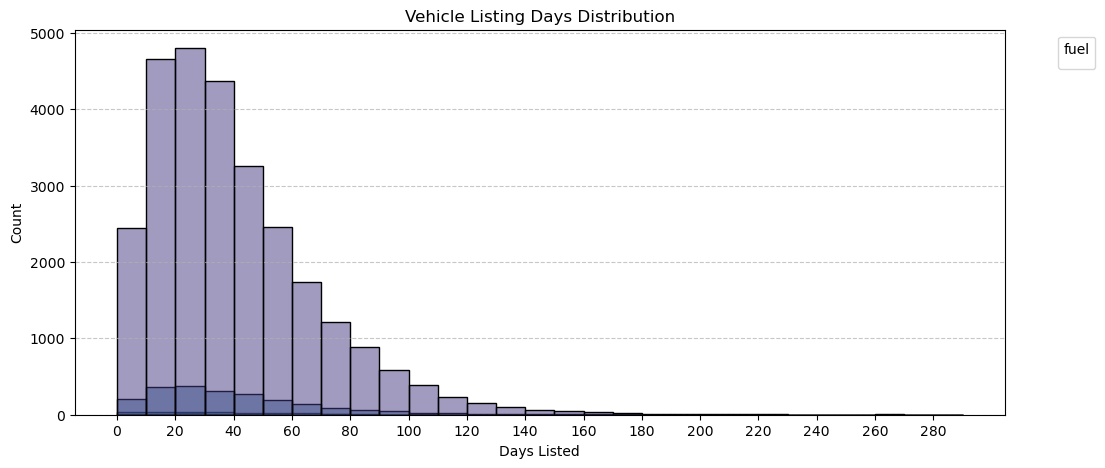

In [112]:
# Plot the distribution using seaborn
plt.figure(figsize=(12, 5))
sns.histplot(data=df_cleaned, hue='fuel', x='days_listed', bins=np.arange(0, 300, 10), palette='viridis', fill=True)

plt.title('Vehicle Listing Days Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 300, 20))

#plt.axvline(15, color='blue', linestyle='--', linewidth=2, label=f'Surf Plan: {15} GB')
#plt.axvline(30, color='orange', linestyle='--', linewidth=2, label=f'Ultimate Plan: {30} GB')

plt.legend(title='fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Days Listed')


plt.show()

### Compare average days listed for each fuel type per each distinct year. Plot a bar plot to visualize it

In [114]:
# Step 1: Convert date_posted to datetime
df_cleaned['date_posted'] = pd.to_datetime(df_cleaned['date_posted'])

# Step 2: Add days_listed as timedelta to date_posted to create date_sold
df_cleaned['date_sold'] = df_cleaned['date_posted'] + pd.to_timedelta(df_cleaned['days_listed'], unit='d')

# Step 3: Extract year_sold
df_cleaned['year_sold'] = df_cleaned['date_sold'].dt.year

# Display updated DataFrame
df_cleaned.head()

C:\Users\felli\AppData\Local\Temp\ipykernel_13084\2889781021.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\felli\AppData\Local\Temp\ipykernel_13084\2889781021.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\felli\AppData\Local\Temp\ipykernel_13084\2889781021.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

price  model_year           model  condition  cylinders fuel  odometer  \
0   5500        2013  hyundai sonata   like new          4  gas    110000   
1  14900        2017    chrysler 200  excellent          4  gas     80903   
2  14990        2014    chrysler 300  excellent          6  gas     57954   
3  12990        2015    toyota camry  excellent          4  gas     79212   
4  15990        2013     honda pilot  excellent          6  gas    109473   

  transmission   type paint_color  is_4wd date_posted  days_listed  date_sold  \
0    automatic  sedan         red       0  2019-02-07           79 2019-04-27   
1    automatic  sedan       black       0  2019-04-02           28 2019-04-30   
2    automatic  sedan       black       1  2018-06-20           15 2018-07-05   
3    automatic  sedan       white       0  2018-12-27           73 2019-03-10   
4    automatic    SUV       black       1  2019-01-07           68 2019-03-16   

   year_sold  
0       2019  
1       2019  
2       2018  
3       2019  
4       2019

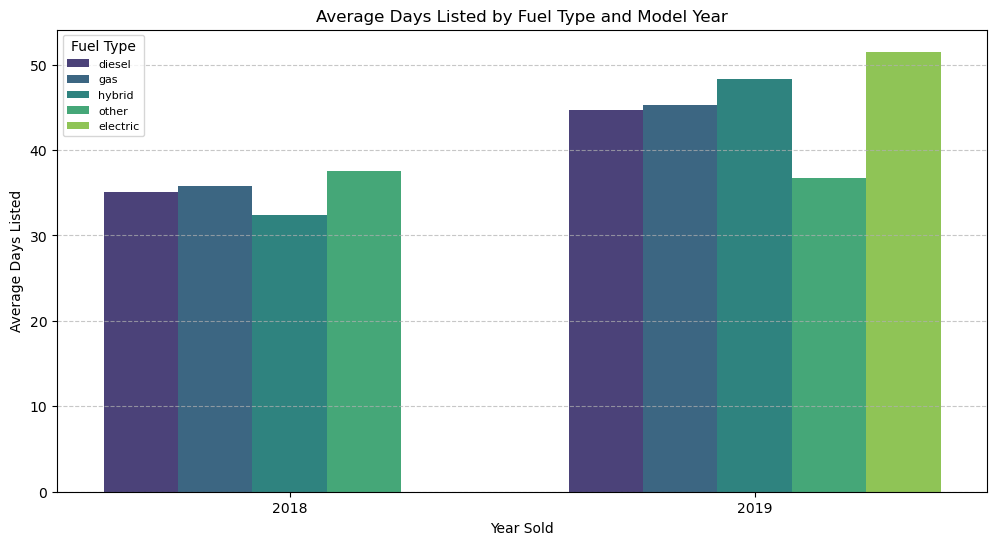

In [117]:
# Group by model_year and fuel, calculate the average days_listed
avg_days_listed = df_cleaned.groupby(['year_sold', 'fuel'])['days_listed'].mean().reset_index()

# Create the Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_days_listed, x='year_sold', y='days_listed', hue='fuel', palette='viridis')

# Add titles and labels
plt.title('Average Days Listed by Fuel Type and Model Year', fontsize=12)
plt.xlabel('Year Sold', fontsize=10)
plt.ylabel('Average Days Listed', fontsize=10)
plt.legend(title='Fuel Type', fontsize=8, title_fontsize='10', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
# Plot the distribution using seaborn
plt.figure(figsize=(12, 5))
sns.histplot(data=df_cleaned, hue='fuel', x='days_listed', bins=np.arange(0, 300, 10), palette='viridis', fill=True)

plt.title('Vehicle Listing Days Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 300, 20))

#plt.axvline(15, color='blue', linestyle='--', linewidth=2, label=f'Surf Plan: {15} GB')
#plt.axvline(30, color='orange', linestyle='--', linewidth=2, label=f'Ultimate Plan: {30} GB')

plt.legend(title='fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Days Listed')


plt.show()